Download Datasets

In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("fanconic/skin-cancer-malignant-vs-benign")
print("Path to dataset files:", path)

100%|██████████| 325M/325M [00:03<00:00, 109MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fanconic/skin-cancer-malignant-vs-benign/versions/4


Libraries

In [2]:
import os
import torch
from fastai.vision.all import *

In [3]:
os.listdir(path)

['data', 'train', 'test']

# DataLoader with all the information

In [4]:
dls = ImageDataLoaders.from_folder(
    path,
    train = "train",
    valid = "test",
    seed = 42,
    item_tfms = Resize(128),
    batch_tfms = aug_transforms()
)

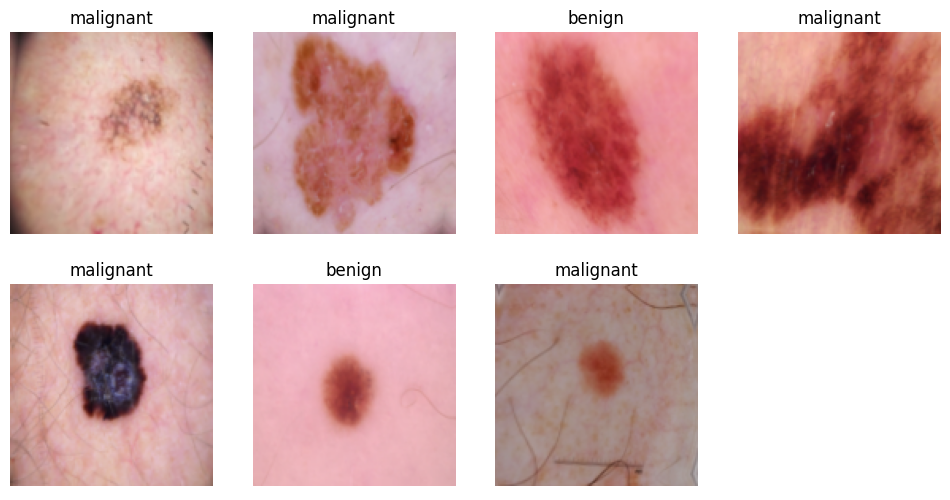

In [5]:
dls.show_batch(max_n = 7)

# Make Model and train it

In [6]:
model = vision_learner(dls,resnet50,metrics = accuracy)
model.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 115MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.896325,0.870756,0.793939,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.667261,0.494732,0.819697,00:12
1,0.563446,0.442695,0.846970,00:12
2,0.478664,0.412724,0.850000,00:14
3,0.401645,0.389254,0.839394,00:12
4,0.331156,0.380998,0.856061,00:12
5,0.286962,0.331496,0.872727,00:12
6,0.246529,0.337705,0.863636,00:12
7,0.220075,0.336721,0.868182,00:12
8,0.199536,0.339483,0.857576,00:12
9,0.192184,0.340504,0.869697,00:12


#See the Results

In [7]:
interpret = ClassificationInterpretation.from_learner(model)

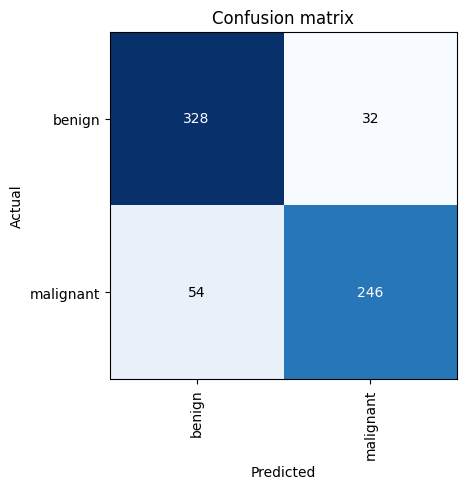

In [8]:
interpret.plot_confusion_matrix()

#Predict on Images

In [11]:
test_image_path = "/content/IMG-20250821-WA0005.jpg"
pred_class, class_index, probs = model.predict(test_image_path)
print(pred_class)

benign


<Axes: title={'center': 'Prediction: benign | Probability:0.9968'}>

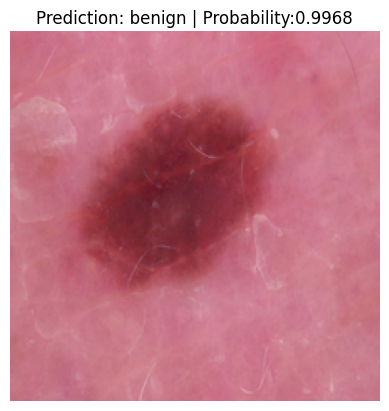

In [13]:
img = PILImage.create(test_image_path)
img.show(ctx=plt.gca(), title=f"Prediction: {pred_class} | Probability:{probs[class_index]:.4f}")

In [15]:
 test_image_path1 = "/content/IMG-20250821-WA0006.jpg"
 pred_class, _ , probs = model.predict(test_image_path1)
 print(pred_class)

malignant


<Axes: title={'center': 'Prediction: malignant | Probability:0.0010'}>

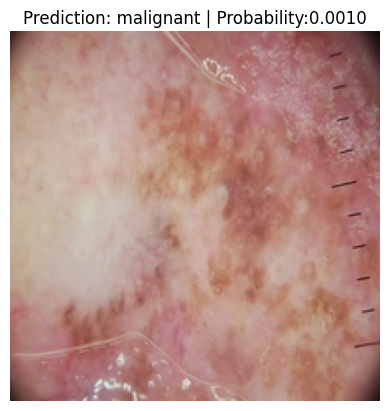

In [16]:
img = PILImage.create(test_image_path1)
img.show(ctx=plt.gca(), title=f"Prediction: {pred_class} | Probability:{probs[class_index]:.4f}")